In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


Importing dataset 

In [3]:
black_fri=pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
black_fri

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In this dataset all information of  columns & 550068 entries are there, some columns include NaN values,incorrect data types

In [4]:

black_fri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# Check basic statistics of dataset
black_fri.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


using describe function display the statistic 

Rename the column

In [6]:
black_fri.rename(columns={'City_Category':'City','Stay_In_Current_City_Years':'City_Years','Product_Category_1':'Product_1','Product_Category_2':'Product_2','Product_Category_3':'Product_3'},inplace=True)
black_fri

,User_ID,Product_ID,Gender,Age,Occupation,City,City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


Rename the all columns for better understanding

In [7]:
# Check for missing values in the data
NaN = pd.DataFrame({'Nan_Values' : black_fri.isna().sum().sort_values(ascending=False)})
NaN

,Nan_Values
Product_3,383247
Product_2,173638
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City,0
City_Years,0
Marital_Status,0


so,there are NaN values in Produc_2 & Product_3 columns.

In [8]:
# check for unique values in data
black_fri.nunique()


User_ID            5891
Product_ID         3631
Gender                2
Age                   7
Occupation           21
City                  3
City_Years            5
Marital_Status        2
Product_1            20
Product_2            17
Product_3            15
Purchase          18105
dtype: int64

check for unique values in data 

In [9]:
black_fri.User_ID.unique()


array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [10]:
for i in black_fri.columns:
    print(black_fri[i].unique)

<bound method Series.unique of 0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: User_ID, Length: 550068, dtype: int64>
<bound method Series.unique of 0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: Product_ID, Length: 550068, dtype: object>
<bound method Series.unique of 0         F
1         F
2         F
3         F
4         M
         ..
550063    M
550064    F
550065    F
550066    F
550067    F
Name: Gender, Length: 550068, dtype: object>
<bound method Series.unique of 0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, 

dataset unique values are display

In [11]:
black_fri['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
black_fri['Age'] = black_fri['Age'].str.replace('+',' ').astype(str)
black_fri.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55,16,C,4+,0,8,NaN,NaN,7969


In black_fri dataset column of Age using str.replace function replace string.

In [13]:
black_fri['City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
black_fri['City_Years'] = black_fri['City_Years'].str.replace('+',' ').astype(str)
black_fri.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55,16,C,4,0,8,NaN,NaN,7969


Here we got some '+' values & datatype is an object,so replace .

In [15]:
d=black_fri.groupby(['Gender', 'Age'])['Product_1'].agg('mean')
d

Gender  Age  
F       0-17     5.367893
        18-25    5.472552
        26-35    5.683086
        36-45    5.742473
        46-50    5.898629
        51-55    6.025571
        55       6.399764
M       0-17     4.939615
        18-25    4.992443
        26-35    5.203406
        36-45    5.412829
        46-50    5.678666
        51-55    5.687279
        55       5.963096
Name: Product_1, dtype: float64

In [16]:
black_fri['Product_2'] = black_fri['Product_2'].fillna(5.3).astype("float32")
black_fri['Product_3'] = black_fri['Product_3'].fillna(5.4).astype("float32") 
black_fri.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,5.3,5.4,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,5.3,5.4,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,5.4,1057
4,1000002,P00285442,M,55,16,C,4,0,8,5.3,5.4,7969


using fillna function replace the all nan values 

In [17]:
black_fri['Gender'].unique()

array(['F', 'M'], dtype=object)

In [18]:
black_fri['Gender']=black_fri['Gender'].map({'M':0 , 'F':1})
black_fri.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,5.3,5.4,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,0-17,10,A,2,0,12,5.3,5.4,1422
3,1000001,P00085442,1,0-17,10,A,2,0,12,14.0,5.4,1057
4,1000002,P00285442,0,55,16,C,4,0,8,5.3,5.4,7969


In data set column of gender using map function executes a specified function for each item in an iterable


Perform EDA
To perform ploting we need to import libraries

Data Visualisation

visualize individul column

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

data visualisation  import searborn and matplot 

In [20]:
black_fri.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City,City_Years,Marital_Status,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,5.3,5.4,8370


* visualize individul column

<Axes: xlabel='Gender', ylabel='count'>

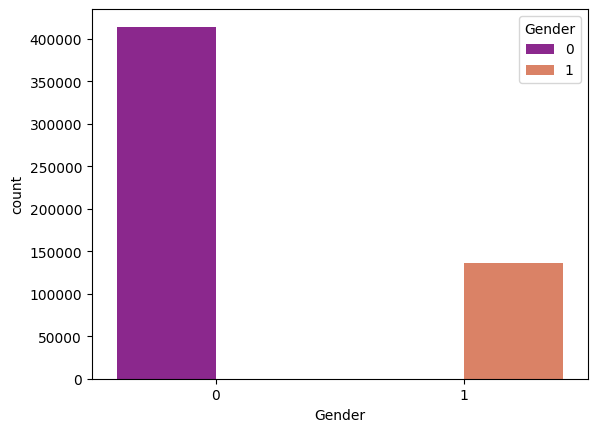

In [21]:
sns.countplot(x='Gender',data=black_fri,palette='plasma',hue='Gender')

So by the plot there are more than 400000 male customers & female customers are in between 100000 to 150000.

Age column

<Axes: xlabel='Occupation', ylabel='count'>

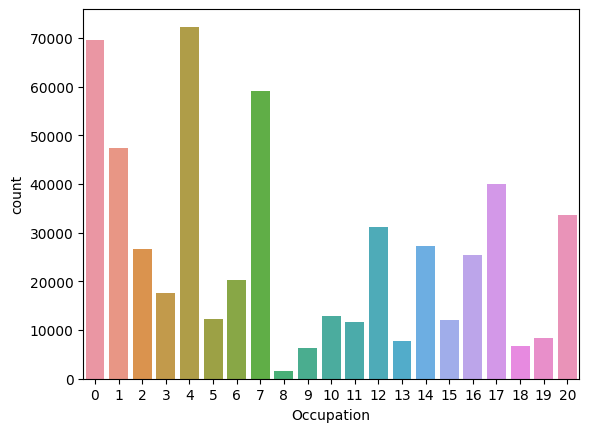

In [22]:
sns.countplot(x='Occupation',data=black_fri,)


Occupation: In our dataset occupation 0,4 & 7 is high in count.

<Axes: xlabel='City', ylabel='count'>

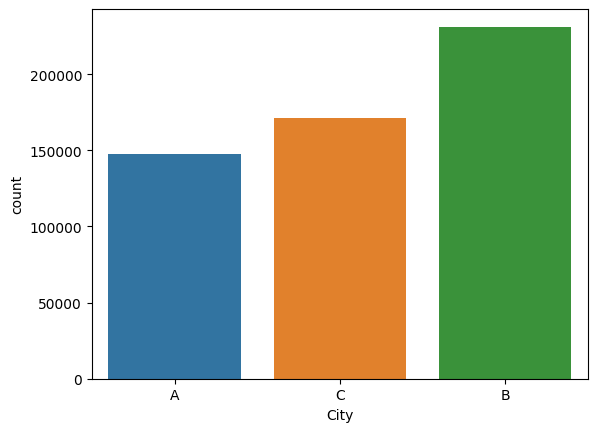

In [23]:
sns.countplot(x='City',data=black_fri)

City: city B counted more than other two cities.

<Axes: xlabel='City_Years', ylabel='count'>

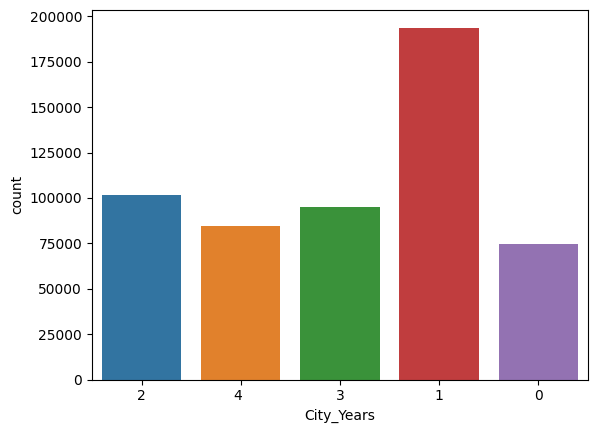

In [24]:
sns.countplot(x='City_Years',data=black_fri)

years in city: Customers who completed 1 year in city are nearly 200000.

<Axes: xlabel='Marital_Status', ylabel='count'>

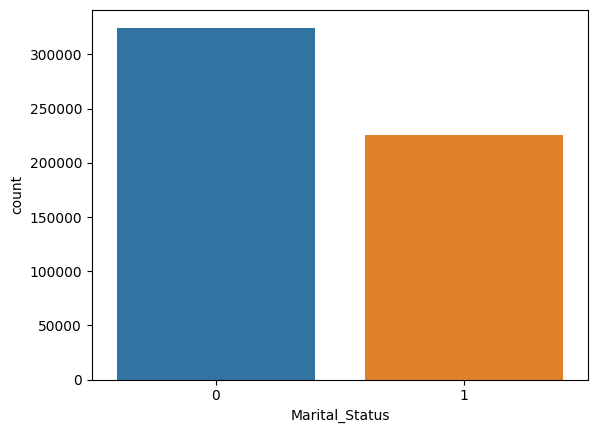

In [25]:
sns.countplot(x='Marital_Status',data=black_fri)

Marrital status: Unmarried customers's count more than married customers.

<Axes: xlabel='Product_1', ylabel='count'>

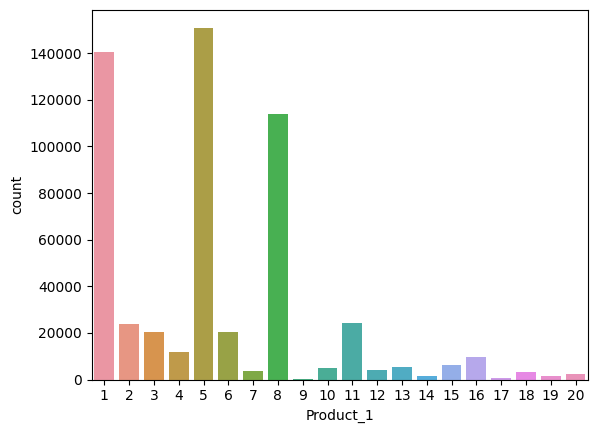

In [26]:
sns.countplot(x='Product_1',data=black_fri)

<Axes: xlabel='Product_2', ylabel='count'>

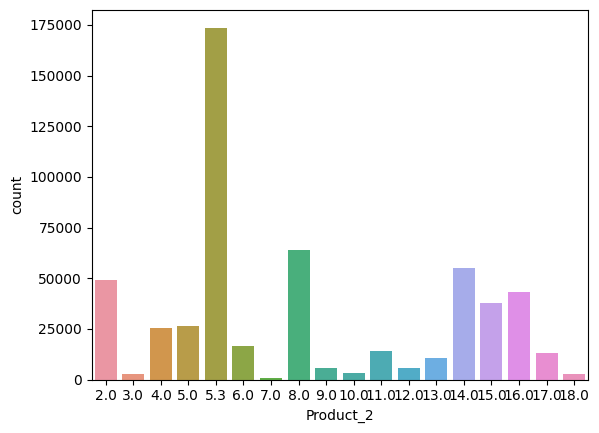

In [27]:
sns.countplot(x='Product_2',data=black_fri)

<Axes: xlabel='Product_3', ylabel='count'>

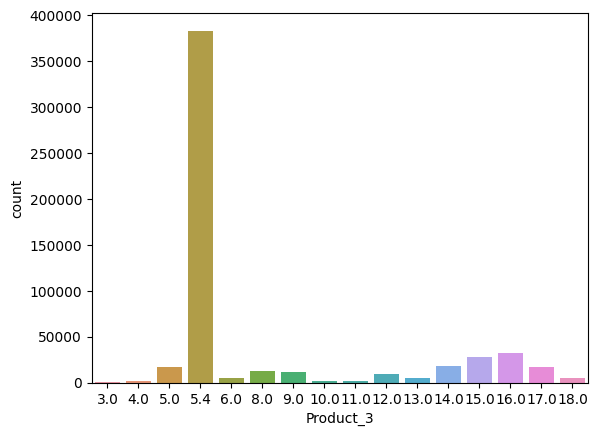

In [28]:
sns.countplot(x='Product_3',data=black_fri)

/tmp/ipykernel_32/2055136410.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=black_fri['Purchase'])


Text(0.5, 1.0, 'Distribution')

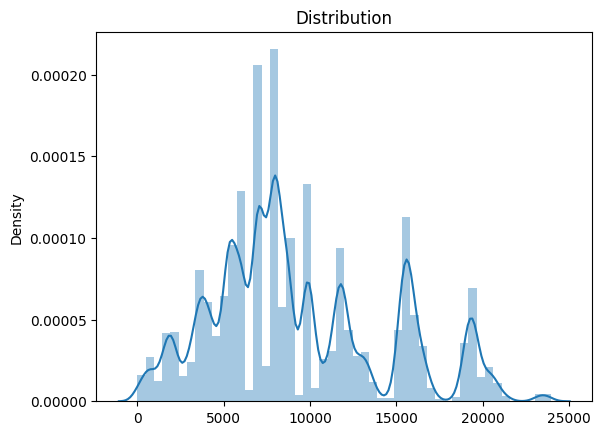

In [29]:
fig, axes = plt.subplots(nrows=1,ncols=1)

sns.distplot(x=black_fri['Purchase'])
axes.set_title('Distribution')

Text(0.5, 1.0, 'Outliers')

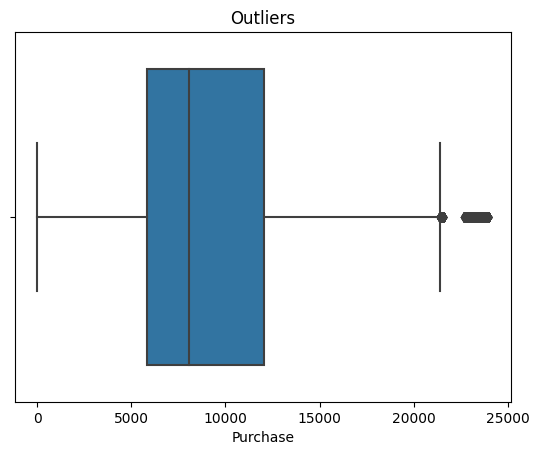

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=1 )
sns.boxplot(x='Purchase', data=black_fri)
axes.set_title('Outliers')

Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc

Gender

Age vs Purchased

<Axes: title={'center': 'Age vs Purchased'}, xlabel='Age'>

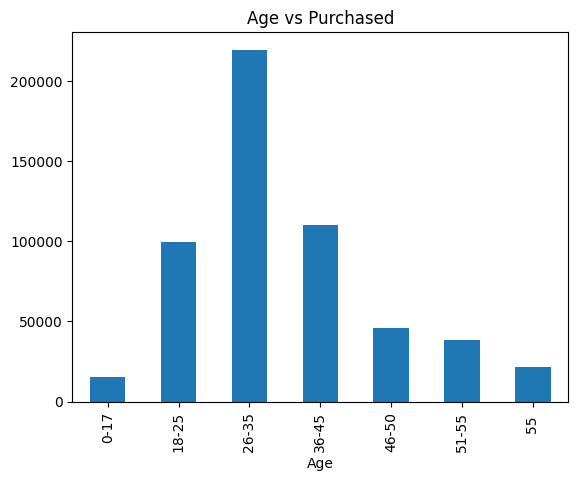

In [31]:

black_fri.groupby(['Age'])['Purchase'].count().plot(kind='bar',title='Age vs Purchased')

Occupation vs Purchased

<Axes: title={'center': 'Occupation vs Purchased'}, xlabel='Occupation'>

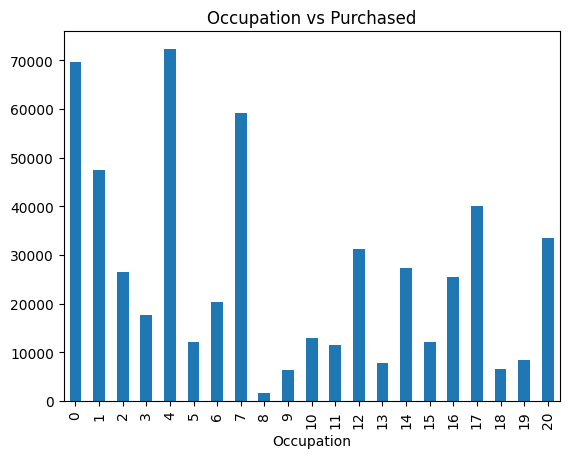

In [32]:
black_fri.groupby(['Occupation'])['Purchase'].count().plot(kind='bar',title='Occupation vs Purchased')

Product_category_1 vs Purchased

<Axes: title={'center': 'Product_1 vs Purchased'}, xlabel='Product_1'>

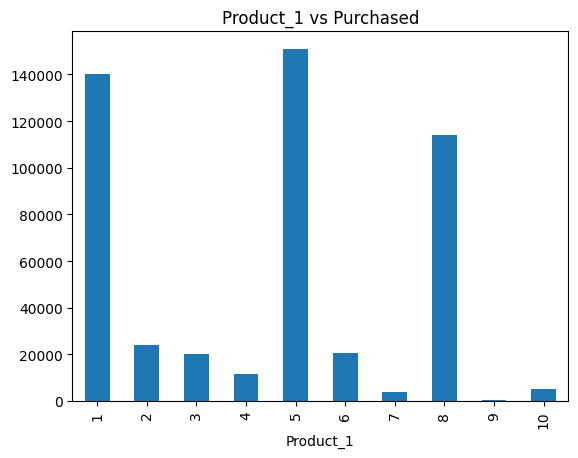

In [33]:
black_fri.groupby(['Product_1'])['Purchase'].count().head(10).plot(kind='bar',title='Product_1 vs Purchased')


<Axes: title={'center': 'Product_2 vs Purchased'}, xlabel='Product_2'>

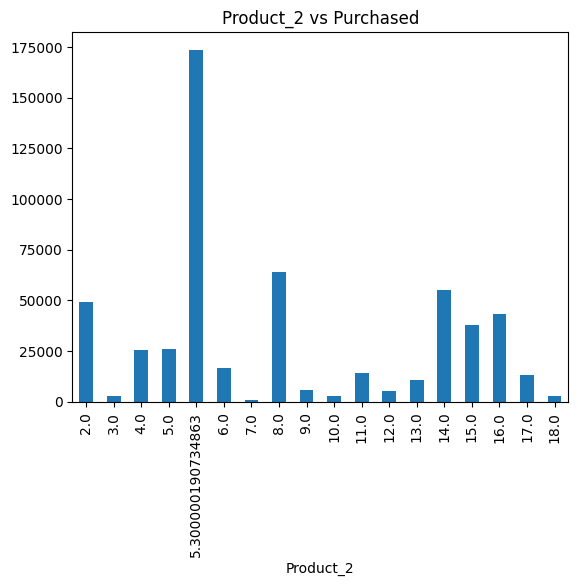

In [34]:
black_fri.groupby(['Product_2'])['Purchase'].count().plot(kind='bar',title='Product_2 vs Purchased')

Product_category_3 vs Purchased

<Axes: title={'center': 'Product_3 vs Purchased'}, xlabel='Product_3'>

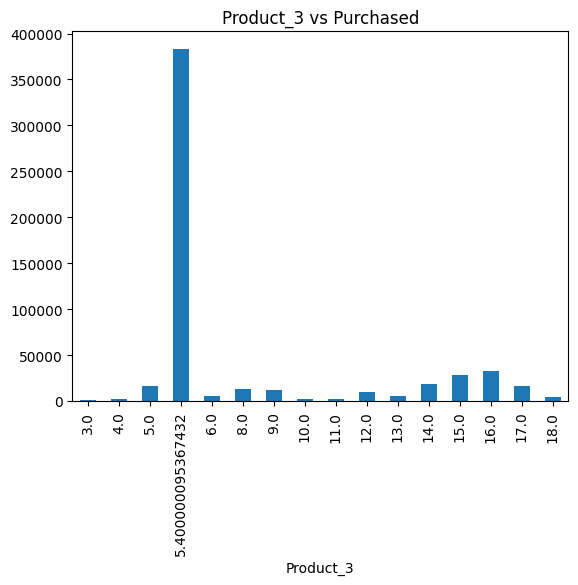

In [35]:
black_fri.groupby(['Product_3'])['Purchase'].count().plot(kind='bar',title='Product_3 vs Purchased')

By looking at Product_3 plot so many customers not purchase any item, few amount of customers bought from this category.

So, plot for all product categories against purchase shows that Product_1 is most popular product category among all categories. Product_Category_2 is averagly popular & Product_3 is not so popular.

# # City category pie chart

<Axes: title={'center': 'City Category Distribution'}, ylabel='count'>

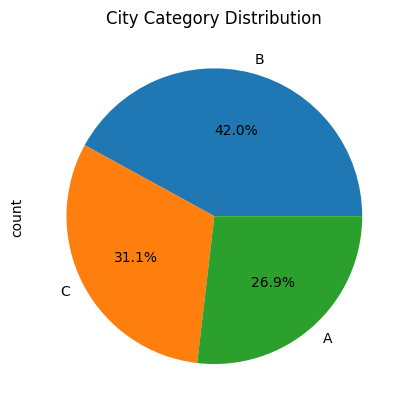

In [36]:

black_fri['City'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='City Category Distribution')


it seems City B has more Customers

# check for more possible plots

 purchase by city

<Axes: title={'center': 'Purchase by City'}, xlabel='City'>

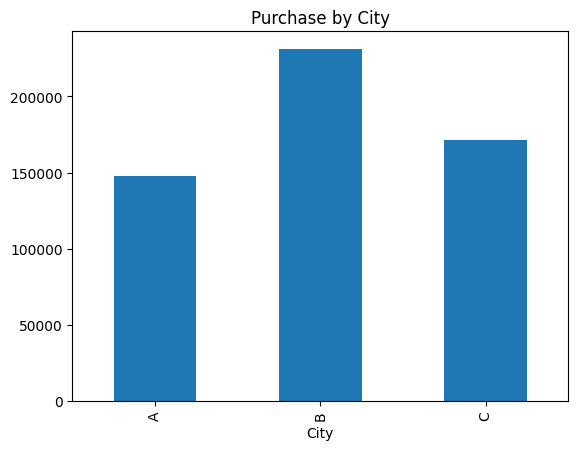

In [37]:
black_fri.groupby(['City'])['Purchase'].count().plot(kind='bar',title='Purchase by City')

purchese by Age

<Axes: title={'center': 'Purchese By Age'}, xlabel='Age'>

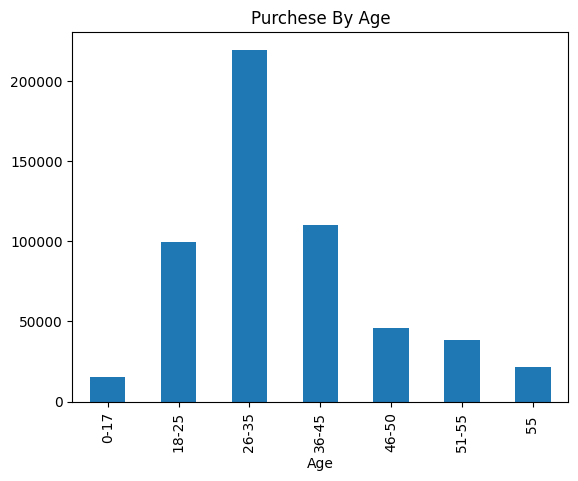

In [38]:
black_fri.groupby(['Age'])['Purchase'].count().plot(kind='bar',title='Purchese By Age')

  Analysis occupation

<Axes: xlabel='Occupation', ylabel='count'>

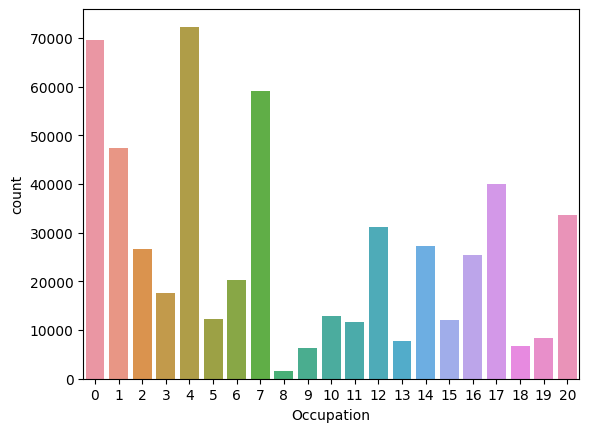

In [39]:
sns.countplot(x='Occupation',data=black_fri)

In our dataset occupation 0,4 & 7 is high in count.

